# Introduction 

A __neural network__ is a method in the field of machine learning used to build predictive models to help to solve complex tasks. The purpose of neural networks is essentially to recognise patterns. This can allow it to perform two categories of tasks: clustering and classification. In this project, we will focus on classification. This is the ability of the network, once given a set of input and output data and enough iterations, to gradually learn the correct mapping between input and output. This allows it to correctly classify the training data given as examples, and also to generalise on test sets it has never seen before. 

A neural network is composed of functional modules known as __nodes__ or __neurons__, which take in an input, apply a mathematical operation, and produce an output. The mathematical operation is to compute the __weighted sum__ of all inputs, add a __bias__ term, and pass the result through a specific __activation function__. The network consists of many layers of these neurons; the outputs of one layer are fed as inputs to the next. By stacking the layers together, the input-output mapping can become arbitrarily complex. The aim is to refine the network to map inputs to the desired outputs. This is done by adjusting the weights and biases to gradually approximate the correct output.

## The XOR problem

An __XOR__ logic gate is one which returns a true value if the two inputs are not equal, and a false value if they are equal. All possible inputs and predicted outputs are shown in _Figure 1_. The __XOR problem__ is the challenge of getting a neural network to correctly predict the outputs of an XOR logic gate, given the pairs of binary input seen in the table.


![Figure 1](https://www.dyclassroom.com/image/topic/logic-gate/xor-xnor/xor-table.png)

We will code our inputs and outputs of the XOR logic gate in the following numpy arrays:



In [215]:
# Import the dependencies we are going to need

import numpy as np                   
import matplotlib.pyplot as plt


# Create input array (x) and output array (y) 

x = np.array([[0, 0], 
              [0, 1],
              [1, 0],
              [1, 1]]) 

y = np.array([[0,1,1,0]]).T

Let's plot the inputs A and B from the table, coloured according to their output classification. We see that the decision boundary for correct classification is not linear. That is, we cannot draw a straight line to split the two categories. This is why the XOR problem is known as a __nonlinear problem__.

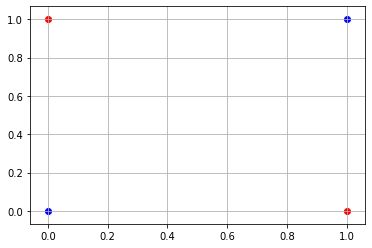

In [216]:
plt.grid()

for i in range(len(x)):
    c = 'r'
    if y[i] == 0:
        c = 'b'
    plt.scatter([x[i][0]], [x[i][1]], c=c)

# Perceptrons

The foundation of any neural network is a __perceptron,__. This is a supervised learning architecture invented by Rosenblatt in 1958. They consist of just one input and one output layer. The main computational steps performed are:

-  Multiply inputs $x$ by their weights $W$
-  Add all the multiplied values together to obtain the __weighted sum__
-  Pass this weighted sum through an activation function 

The activation function commonly used is a _step function,_ defined as follows:

$$f(x) =\left\{\begin{array}{ll}0 & \mbox{if } 0 > x \\{1} & \mbox{if } x \geq 1\end{array}\right.$$

The weighted sum is therefore tranformed to either a 1 or a 0. The perceptron hence acts as a linear classifier capable of performing binary classification. A rule of thumb of perceptrons is that, if the problem is linearly separable, they are capable of finding a separation between the two classes. 

We can visualise the architecture of a perceptron in _Figure 2_ :

![Figure 1](https://www.researchgate.net/profile/Soufiane_Belharbi/publication/326439111/figure/fig2/AS:669487372181508@1536629636103/Perceptron-model-Notation-x-i-is-the-i-th-component-of-x-the-same-as-x-i-in-Eq116.png)



## The Perceptron Learning Rule 

The __perceptron learning rule__ is the specific way in which the weights and biases of the perceptron are updated according to whether is output predictions are correct or not. In this case, we are going to use __stochastic gradient descent__, which is a method for minimising the error by following the gradients of a __cost function__ which defines such error. 

To calculate the error in the prediction, we first need to define the __objective function__ of the perceptron; that is, what is it trying to optimise?

### Hinge loss function

To define the objective function, first we need to define a __loss function__. In this case, we use the __hinge loss__, denoted $C$. Assuming that $y$ is our input and $\hat{y}$ is our prediction, the hinge loss is defined as the following:

### $$C = 1 - y * \hat{y}$$

This means that the hinge loss is __0__ if the dot product of the actual and predicted output is greater than __1__, and $1 - y * \hat{y}$ otherwise.

### Objective function 

We can now define the __objective function__ for the perceptron, which tells us if an output was misclassified or not:

### $$l_i(w) = (-y_i\sum_{i=1}^{n}x_i w)$$

So the sample $x_i$ is missclassified if $y_i\langle x_i, w \rangle \leq 0$. The goal is to find the global minima of this function. As such, we need to find a parameter $w$ where the error is zero. 

To do this, we need to find the gradient of the objective function. The gradient, the vector of the function's __partial derivatives__, is defined as follows:

### $$ \nabla{l_i}(w) = -y_i x_i$$

We can therefore update the weights by moving down the direction of this gradient, as follows:

### $$w = w + y_i x_i$$


# Implementing a perceptron to perform linear classification

With this in mind, let's try to code a simple perceptron algorithm in Python. First, we'll generate some simple linearly-separable data, labelled according to its category. For simplicity, we'll include the __bias term__ as a final column of __-1s__ in the input data array. 

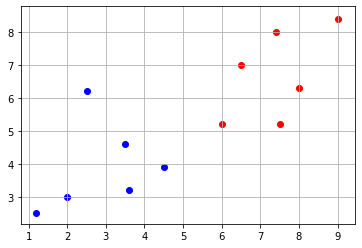

In [217]:
# Generate linearly-separable data for the perceptron 

x = np.array([[2,     3, -1], 
              [3.5, 4.6, -1],
              [1.2, 2.5, -1],
              [3.6, 3.2, -1], 
              [4.5, 3.9, -1], 
              [2.5, 6.2, -1], 
              [6,   5.2, -1], 
              [8,   6.3, -1], 
              [7.4,   8, -1], 
              [6.5,   7, -1], 
              [9,   8.4, -1], 
              [7.5, 5.2, -1]]) 

y = np.array([[-1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1]]).T

# Plot the data to visualise what it looks like

plt.grid()

for i in range(len(x)):
    c = 'r'
    if y[i] == -1:
        c = 'b'
    plt.scatter([x[i][0]], [x[i][1]], c=c)

Next, we'll code a perceptron using weight update via stochastic gradient descent. We'll do so by creating a linear for-loop over the input data. We can experiment with incresing the number of training iterations until the input data is classified correctly. 

To visualise the reduction in error over time, we will also plot the total error at each epoch. 

[ 30.3 -18.1  68. ]


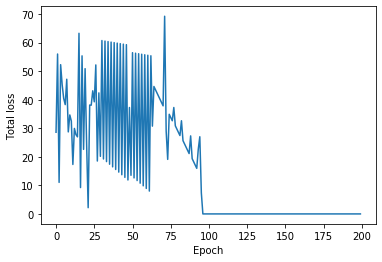

In [218]:
def perceptron(X, Y):
    
    ''' 
    Implement stochastic gradient descent for an input array X and classification vector Y'''
    
    w = np.zeros(len(X[0]))    # Define a weight vector, initiated with 0s 
    eta = 1                    # Set the 'learning rate'; this is necessary to control the size of the steps of the weight update
    epochs = 200               # Set the number of training iterations we want to perform
    errors = []                # Create an empty list to store the errors 
    
    for t in range(epochs):             # Iterate over the input data for the number of epochs
        total_error = 0
        for i, x in enumerate(X):       # Iterate over each sample of the dataset 
            if (np.dot(X[i], w)*Y[i]) <= 0:              # Condition for misclassification 
                total_error += (np.dot(X[i], w)*y[i])    # Calculate the error 
                w = w + eta*X[i]*Y[i]                    # Update rule, as defined above
        errors.append(total_error*-1)   # Append the error for this sample to the total error 
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total loss')
    
    return w

print(perceptron(x, y))

As we can see, the perceptron has succesfully reduced its error and learned the correct output classifications. It achieves this in about 100 training epochs.

# Multilayer Perceptrons 

Perceptrons initially appeared very promising and effecting classification algorithms. However, they are hindered by one major limitation. They are __only capable__ of solving problems which are linearly separable. Hence, they cannot solve our XOR problem. 


The solution is to expand beyond the single-layer architecture by adding another layer of units, known as the 'hidden layer'. This is known as a _multilayer perceptron (MLP)._ An MLP can have any number of hidden layers, and any number of units in each layer. They are fully connected, meaning all the nodes from the current layer are connected to the next. The presence of a hidden layer is exactly what allows the network to learn non-linear mappings; the first layer combines the inputs, and the second layer maps these combinations of inputs to the output.

We can visualise the architecture thus:

![Figure 1](https://www.vojtech.net/img/machine-learning/multilayer-perceptron.png)


The activation function used in MLPs is a nonlinear function - typically the __sigmoid function__ - which compresses the result to any continuous value between 0 and 1. Instead of performing a discrete binary classification, this therefore gives the probability of an input belonging to a certain class. 

The sigmoid function, which we will use in implementing the MLP, is defined as follows:

## $$σ(z) = \frac{1}{1 + e^{-z}}$$

And its __derivative__ - which we will need later - is the following:

## $$σ'(z) = z(1-z)$$

We will write the sigmoid function, along with its derivative, using the following code. We will also plot both functions to visualise their behaviour. Note how negative values are compressed toward 0, and positive values  to 1. 


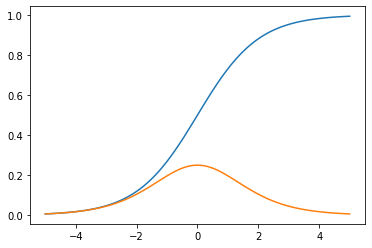

In [219]:
# Define sigmoid function and its derivative 

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def sigmoid_prime(z):
    return z*(1-z)

# Visualise the function

z = np.linspace(-5, 5, 100)
plt.plot(z, sigmoid(z))
plt.plot(z, sigmoid_prime(sigmoid(z)))

# Forward propagation 

Firstly, the MLP performs _forward propagation_. This is the process of generating an output prediction given the inputs. The prediction is arbitrary at first; it will be improved with training.


An MLP is different from a perceptron in that it performs multiple linear classifications in parallel, one for each of the C output classes. We therefore need a weight vector $(w_1,w_2,…,w_C)$ and a bias value $(b_1,b_2,…,b_C)$ for each class. The output $\hat{y}$ of the perceptron should be a $C$-dimensional vector, whose entries contain the probability of the respective class:

### $$\begin{equation*}
\hat{y} = 
\begin{pmatrix}
σ(w_1^Tx + b_1) \\
σ(w_2^Tx + b_2) \\
... \\
σ(w_C^Tx + b_C)
\end{pmatrix}
\end{equation*}$$


To do this efficiently, we can arrange the weight vectors in a matrix $W$, of dimensions ($d × C$), where $d$ is the dimensionality of the input dataset. We can also arrange the bias values in a vector $b$ of length $C$:

### $W=(w_1,w_2,…,w_C)∈\mathbb{R}^{d×C}$ 


### $\vec{b}=(b_1,b_2,…,b_C)^T∈\mathbb{R}^C$

The __output__ is obtained by computing the dot product of the input matrix with the weight matrix $W$, adding the bias vector $\vec{b}$, and applying the sigmoid function element-wise. 

The computation is therefore:

### $$f(x) = σ (xW + \vec{b})$$

### Batch computation 

The matrix form allows us to enter more than one data point at a time. Instead of a single point $x$, we can feed in a matrix $X∈\mathbb{R}^{Nxd}$ containing one point per row. So there are $N$ rows of d-dimensional points. Instead of $xW$, we compute the matrix multiplication $XW$. This returns an $N × C$ matrix, with each row containing $xW$ for each data point $x$. To each row, we add a bias vector, which is now a $1 × m$ row vector. 

The forward propagation through the network is therefore essentially performing:

### $$f(X) = σ (XW + \vec{b})$$



# Backpropagation 

Like perceptrons, MLPs use stochastic gradient descent to update their weights and allow the network to 'learn'. However, since we have more layers, we need to use__backpropagation,__ which is a little more refined. It allows us to 'backpropagate' the error through each of the layers in the network, targeting those weight values at each node which have the largest influence on the final predictions.

The process can be summarised in two stages:

### Step 1.  Calculate the error 

In the case of MLPs, the cost function most commonly used is the _mean squared error (MSE)_. It is defined thus:

### $$ MSE = \frac{1}{n}\sum_{i=1}^{n}(predicted - observed)^2 $$

Where $n$ is the number of observations.

### Step 2.   Minimise the cost

In a similar way as before, we need to calculate the partial deriative of the cost function with respect to each weight and bias. We can then subtract the result from the current weights to get the updated weights at the next time step.

To be explicit, let us denote the MSE cost function as $C$, and keep the desired output as $y$ and the predicted output as $\hat{y}$. At each iteration, we then have:

### $$ C = \sum_{i=1}^{n}(y - \hat{y})^2$$

The __partial derivative__ of $C$ with respect to each weight $W$ at each layer can be expressed using the chain rule as:

### $$\frac{\partial{C}}{\partial{W}} = \frac{\partial{C}}{\partial{\hat{y}}} * \frac{\partial{\hat{y}}}{\partial{{z}}} * \frac{\partial{z}}{\partial{W}}$$

Here, $z$ is the activation $Wx + b$, before being activated by the sigmoid function.

We know, analytically, all three terms of this equation:

### $$\frac{\partial{C}}{\partial{\hat{y}}} = 2(y - \hat{y}) \;, \;\;\;  \frac{\partial{\hat{y}}}{\partial{z}} = z(1-z) \;\;\;\mbox{and }\;\; \frac{\partial{z}}{\partial{W}} = x$$

 
And thus can re-express as:

### $$\frac{\partial{C}}{\partial{W}} = 2(y - \hat{y}) * z(1-z) * x$$

This allows us to  calculate the __partial derivative of the loss function__ with respect to the weights explicitly. We then increment the weights by adding the dot product of the output of each layer with this partial derivative.


# Implementing an MLP to solve the XOR problem 


With this background now in place, let us code a simple MLP, with one hidden layer, capable of solving the XOR problem. We already have our activation function, input data and output data defined. The next step is to create the __weights and biases__. To make the code explicit at this stage, we will define the weights between the input-hidden and hidden-output layer as two separate variables, __W0__ and __W1__. We will include the bias as a __-1__ term as before

In [224]:
# Initialise inputs and outputs for XOR problem 

x = np.array([[0, 0], 
              [0, 1],
              [1, 0],
              [1, 1]]) 

y = np.array([[0,1,1,0]]).T

# Seed random numbers to make the output of the calculations deterministic 

np.random.seed(1)

# Obtain dimensions of input array

l = len(x)           # Number of output classes, C
l1 = len((x)[0])     # Dimensionality of input dataset, d

# Initialise weight matrices W0 and W1

W0 = 2*np.random.random((l1, l)) - 1  # dxC matrix of weights from input to hidden layer
W1 = 2*np.random.random((l, 1)) - 1  # Cx1 matrix of weights from hidden to output layer 

Let us then create the __training loop__. First we perform forward propagation, then backpropagation. We run it over a large number of iterations (in this case, 50'000). 

Text(0, 0.5, 'Total loss')

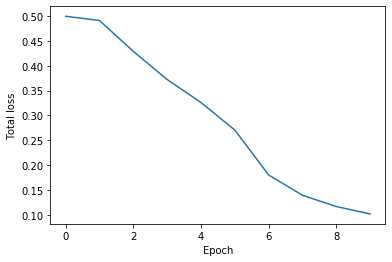

In [225]:
iterations = 1000      # Set the number of iterations to perform
errors = []             #  Create an empty list to store the errors 

# Create the training loop 

for j in range(iterations):
    
    MSE = 0                   # Initialise the mean squared error to 0
    
    l0 = x                            # Set the first layer, l0, equal to the training data 
    l1 = sigmoid(np.dot(l0, W0))      # Set the hidden layer, l1, equal to the result of forward propagation on the first layer
    l2 = sigmoid(np.dot(l1, W1))      # Set the output layer, l2, equal to the result of forward propagation on the second layer
    
    # Calculate the error between the predicted and desired output
    
    l2_error = y - l2
    
    # Calculate the MSE every 100 iterations, to visualise the improvement over time
    
    if j%100 == 0:
        MSE += np.mean(np.abs(l2_error))
        errors.append(MSE)   # Append the error for this sample to the total error
        
    # Backpropagate the error through l2 and l1 to obtain how each l1 output contributes to the l2 error 
    
    l2_delta = l2_error * sigmoid_prime(l2) 
    l1_error = l2_delta.dot(W1.T)
    l1_delta = l1_error * sigmoid_prime(l1)    # Produces a greater value for l1 values which contribute more greatly to the error 
    
    # Update the weights in a manner which aims to counteract the error they produce 
    
    W1 += np.dot(l1.T, l2_delta)    # If the weights contribute a lot to the error in their layer, the update is a large in the opposite direction to the error, and vice versa
    W0 += np.dot(l0.T, l1_delta)
    
    
# Plot the errors every 100 iterations 

plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Total loss')
    

We can observe the error decreasing progressively over the iterations. From the graph, we see that it took around 8 lots of 100 iterations (that is, 800 iterations) to reduce the loss right down to zero. Let's now print the network's output prediction after 50'000 iterations. We will also print the desired output, y, as a reminder of what we're aiming for.

In [214]:
print("Desired output: ")
print(y)

print("\n" + "Output after training:")
print(l2)

Desired output: 
[[0]
 [1]
 [1]
 [0]]

Output after training:
[[0.09602611]
 [0.91554523]
 [0.91061715]
 [0.09625734]]


We see that the network's predictions have converged to be very close to our desired outputs. In other words, the MLP has learned to correctly classify the inputs in the truth table of the XOR problem. Indeed, if we round the outputs to their nearest integer, we can see this more clearly:

In [78]:
print("Rounded output after training: ")
print(np.rint(l2))

Rounded output after training: 
[[0.]
 [1.]
 [1.]
 [0.]]


# Evaluation 

To wrap up, some words about my personal experiences with this project. Although it may not appear as such, this endeavour was a huge undertaking for me. I spent an enormous amount of time immersing myself in the hype of neural networks, consuming resource after resource, following what appeared to be a never-ending chain of potential information. Since the field has exploded so much in recent years, there is an enormous amount of content online - web tutorials, books, mini-series, video tutorials, online courses - each proposing their own angle of attack. This was both a blessing and a curse for me. It was extremely useful to have such a wealth of perpectives, and such scope of examples to learn from - but it was also extremely overwhelming to navigate, and left me always burrowing down rabbit holes that were difficult to emerge from. I would spend days reading different angles of explanation from different disciplines, and experimenting with architectures that were all supposed to be doing the same thing, but didn't match. Ultimately, I have still not been able to fully synthesise the common ground between them. This is why I ended up limiting myself to the overly-simplistic result we find here, instead of 'feigning' a mastery of what to me is still unclear. My small fear is that such a result is not reflective, and does not fully 'do justice' to the amount of work that was involved in reaching this point - but this should hardly be a matter of concern.

Ultimately, I am extremely happy to have carried out this project, and am grateful to PCBS for the excuse to spend time on something I have been wishing to explore deeply. I enjoyed immensely the process of discovery, immersion, and sometimes complete 'burial' in something which has for a long time been a black box. I especially enjoyed getting to grips with the calculus of backpropagation and spending hours getting lost in the dimensionality of different matrices. Most pages of my notebooks are now covered in some form of lines and dots. But, I shall be grateful, for my basic linear algebra intuitions have greatly improved as a result - something which is personally crucial from here on out. I also hugely enjoyed learning the basics of LaTeX for the purposes of the Jupyter Notebook write-up, which I have been wishing to do for some time. Now I am extremely motivated to improve my efficiency in both LaTeX and markdown, recognising how useful and streamlined they can be. Finally, I look forward to making slow but sure progress in Python - and continuing to be motivated, and hopefully not paralysed, by the recognition of how much I do not know. 